In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.rcParams.update({'font.size': 14})  # default font size 14

In [2]:
paleoseismicity = pd.read_excel('Philibosian_Meltzner.xlsx')
print(paleoseismicity.head())

   Year  N lat  S lat Type                              Primary source  \
0  1394    5.0    2.5  NaN                       Meltzner et al., 2010   
1  1450   14.0    2.5  NaN                       Meltzner et al., 2010   
2  1660    5.0    3.5  NaN                                   Reid 2016   
3  1679   14.0   13.0  NaN  Rajendran et al., 2007; Malik et al., 2011   
4  1847    7.5    6.6  NaN                         Bilham et al., 2005   

   Subduction zone              Segment                         Source   
0  Sumatra-Andaman  Aceh-Adaman segment  Philibosian and Metlzner, 2020  
1  Sumatra-Andaman  Aceh-Adaman segment  Philibosian and Metlzner, 2020  
2  Sumatra-Andaman  Aceh-Adaman segment  Philibosian and Metlzner, 2020  
3  Sumatra-Andaman  Aceh-Adaman segment  Philibosian and Metlzner, 2020  
4  Sumatra-Andaman  Aceh-Adaman segment  Philibosian and Metlzner, 2020  


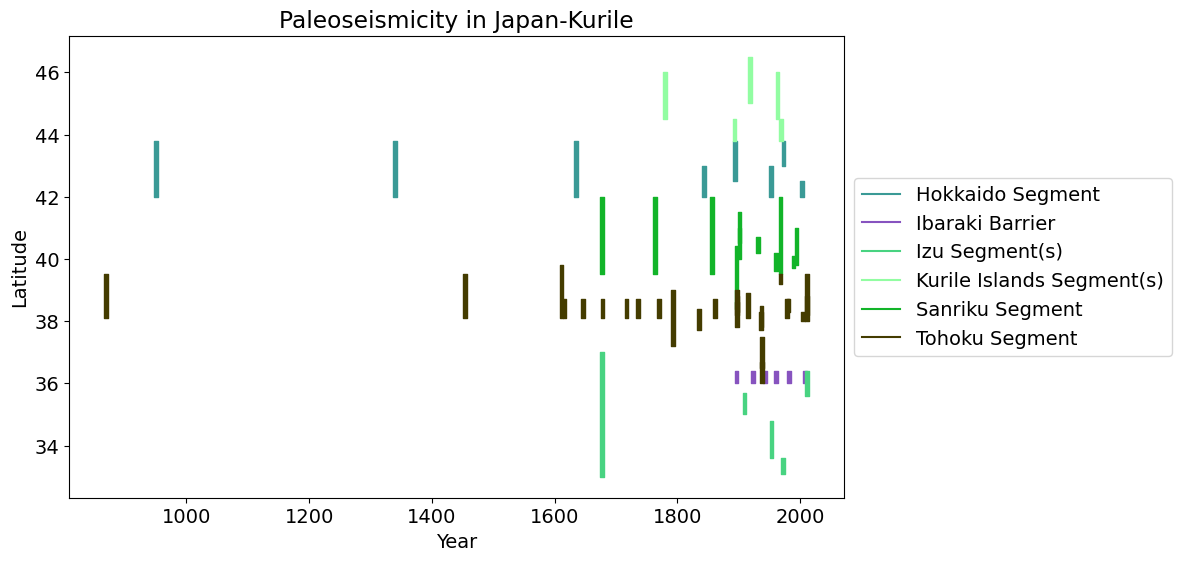

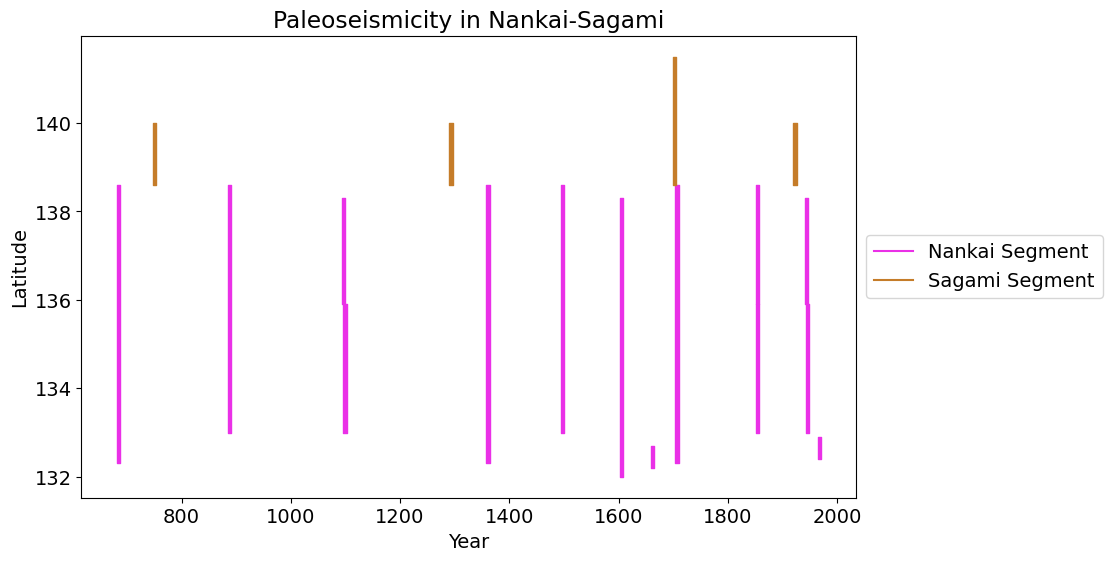

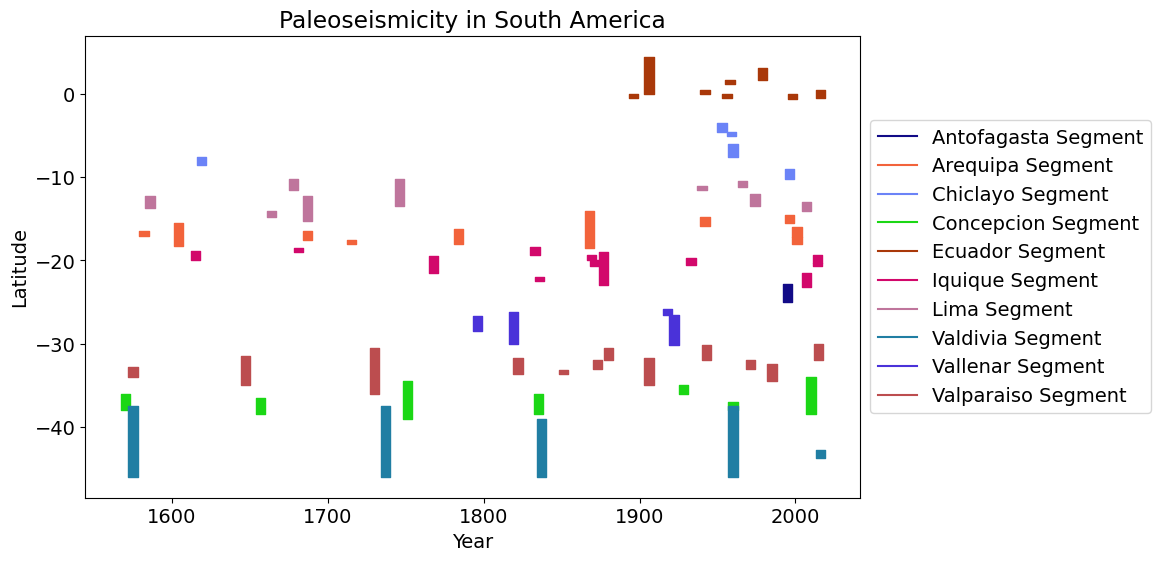

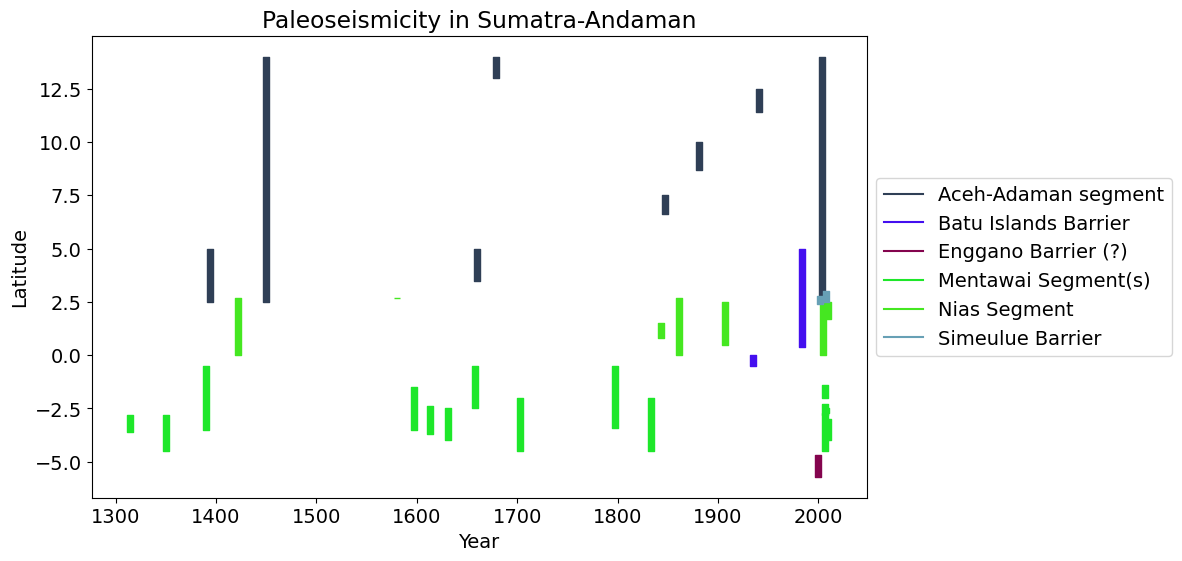

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your paleoseismicity data into a Pandas DataFrame
# Let's assume you have a DataFrame named df with the necessary columns.

# Create a dictionary to store random colors for segments
segment_colors = {}

# Group the data by the 'Subduction zone' column and iterate over the unique values to create rectangles for each category
for subduction_zone, group in paleoseismicity.groupby('Subduction zone'):
    # Create a new figure for each subduction zone
    plt.figure(figsize=(10, 6))
    
    # Create an empty dictionary to track segments for the legend
    legend_segments = {}
    
    # Iterate over unique segments in this subduction zone
    for segment, segment_data in group.groupby('Segment'):
        # If the segment doesn't have a color assigned, generate a random color
        if segment not in segment_colors:
            random_color = np.random.rand(3,)  # Generate a random RGB color
            segment_colors[segment] = random_color
        
        # Extract data for this segment
        years = segment_data['Year']
        n_lat = segment_data['N lat']
        slat = segment_data['S lat']
        
        # Create rectangles for each segment using the assigned color
        color = segment_colors[segment]
        for year, north_lat, south_lat in zip(years, n_lat, slat):
            plt.fill_betweenx([south_lat, north_lat], year - 3, year + 3, label=segment, color=color)
        
        # Add the segment to the legend dictionary
        legend_segments[segment] = color
    
    # Set plot labels and title
    plt.xlabel('Year')
    plt.ylabel('Latitude')
    plt.title(f'Paleoseismicity in {subduction_zone}')
    
    # Create the legend using the legend_segments dictionary
    legend_handles = [plt.Line2D([0], [0], color=color, label=segment) for segment, color in legend_segments.items()]
    plt.legend(handles=legend_handles, loc='upper right')
    plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Show the plot for this subduction zone
    plt.show()
